In [ ]:
"""
  Only execute the commented code in Google Colaboratory to download the dataset in a zip file
"""
! gdown --id 1-ySD5q7lZwgjsYHdbPgbqM7bff0M5MGB
from zipfile import ZipFile
with ZipFile("/content/EuroSAT_dataset.zip", 'r') as zip:
  zip.extractall("/content/dataset")

Downloading...
From: https://drive.google.com/uc?id=1-ySD5q7lZwgjsYHdbPgbqM7bff0M5MGB
To: /content/EuroSAT_dataset.zip
100% 69.8M/69.8M [00:01<00:00, 45.8MB/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import tensorflow.keras

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
size = 64
batch_size = 15
base_dir = "/content/dataset/EuroSAT_dataset"

train_data_dir = base_dir
validation_data_dir = train_data_dir
LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]

In [ ]:
# DATA SOURCE & AUGMENTATION --------------------------------------------------

train_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255,
        rotation_range = 180,
        zoom_range = 0.15,
        horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='categorical',
        subset = "training",
        classes = LABELS,
        seed = 2022
)

validation_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = False,
        subset = "validation",
        classes = LABELS,
        seed = 2022
)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


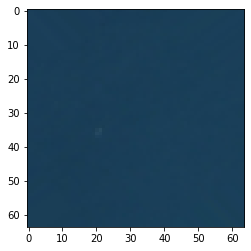

In [ ]:
# Visualization of the first image of the first batch
image = np.array(train_generator[0][0][0], dtype='float')
plt.imshow(image)
plt.show()

In [ ]:
# MODEL --------------------------------------------------


# Convolutional Layers

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))

model.add(Conv2D(64, (5, 5), activation='relu'))


# Dense Layers

model.add(Flatten())

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(learning_rate=0.5),
              metrics=['accuracy'])

In [ ]:
# TRAINING --------------------------------------------------

epochs = 25

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=8, restore_best_weights=True)

histogram = model.fit(
        train_generator,
        validation_data = validation_generator,
        epochs=epochs,
        callbacks = [early_stop]
)

Epoch 1/25
1067/1067 [==============================] - 29s 27ms/step - loss: 1.8441 - accuracy: 0.2684 - val_loss: 1.3997 - val_accuracy: 0.4392
Epoch 2/25
1067/1067 [==============================] - 28s 26ms/step - loss: 1.3435 - accuracy: 0.4997 - val_loss: 0.9899 - val_accuracy: 0.6475
Epoch 3/25
1067/1067 [==============================] - 28s 26ms/step - loss: 1.0591 - accuracy: 0.6403 - val_loss: 0.9087 - val_accuracy: 0.7050
Epoch 4/25
1067/1067 [==============================] - 28s 26ms/step - loss: 0.9093 - accuracy: 0.6909 - val_loss: 0.9892 - val_accuracy: 0.6668
Epoch 5/25
1067/1067 [==============================] - 28s 27ms/step - loss: 0.8284 - accuracy: 0.7204 - val_loss: 0.7024 - val_accuracy: 0.7492
Epoch 6/25
1067/1067 [==============================] - 28s 26ms/step - loss: 0.7729 - accuracy: 0.7432 - val_loss: 0.6552 - val_accuracy: 0.7768
Epoch 7/25
1067/1067 [==============================] - 29s 27ms/step - loss: 0.7219 - accuracy: 0.7579 - val_loss: 0.6470 -

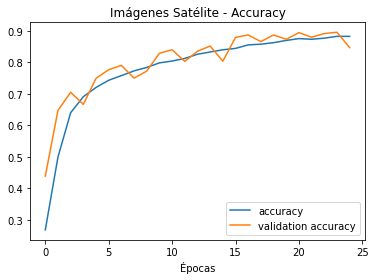

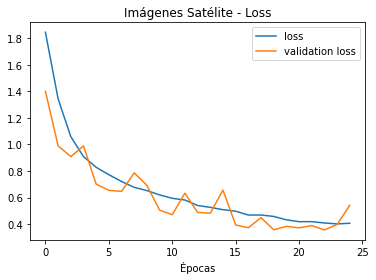

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 96)        110688    
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)         

In [ ]:
# VISUALIZATION OF TRAINING METRICS --------------------------------------------------

plt.plot(histogram.history['accuracy'], label='accuracy')
plt.plot(histogram.history['val_accuracy'], label='validation accuracy')

plt.title('Imágenes Satélite - Accuracy')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

plt.plot(histogram.history['loss'], label='loss')
plt.plot(histogram.history['val_loss'], label='validation loss')

plt.title('Imágenes Satélite - Loss')
plt.xlabel('Épocas')
plt.legend(loc="upper right")

plt.show()

model.summary()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(validation_generator, (4000 // batch_size + 1))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=LABELS))

Confusion Matrix
[[303   3   2  31   0  11   4   0  41   5]
 [  0 399   1   0   0   0   0   0   0   0]
 [  2  34 278  19  11  20   9  19   8   0]
 [  2   1   1 360  16   1   1   7  11   0]
 [  0   0   0   2 385   0   0   9   4   0]
 [  1  64   3   3   0 320   0   1   8   0]
 [  8   0  80  45  18   5 223  11  10   0]
 [  0   0   0   0  10   0   0 390   0   0]
 [  0   9   3  19   0   9   0   0 360   0]
 [  1  23   0   0   0   2   0   0   5 369]]
Classification Report
                      precision    recall  f1-score   support

          AnnualCrop       0.96      0.76      0.85       400
              Forest       0.75      1.00      0.86       400
HerbaceousVegetation       0.76      0.69      0.72       400
             Highway       0.75      0.90      0.82       400
          Industrial       0.88      0.96      0.92       400
             Pasture       0.87      0.80      0.83       400
       PermanentCrop       0.94      0.56      0.70       400
         Residential       0.89  